In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# loading Dataset

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train.head()

In [ ]:
##statistical INfo
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

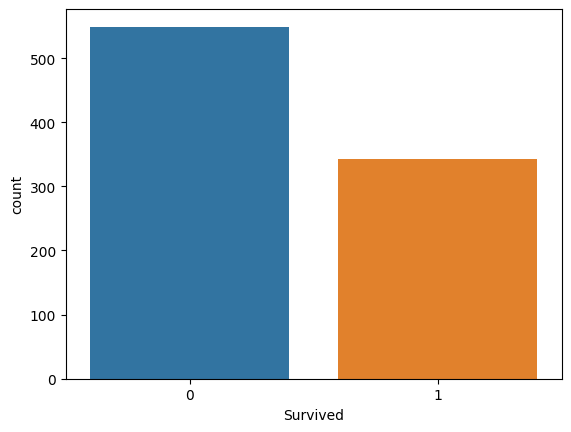

In [ ]:
#Exploratory Data Analysis
##Catagorical Attributes

sns.countplot(x=train['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

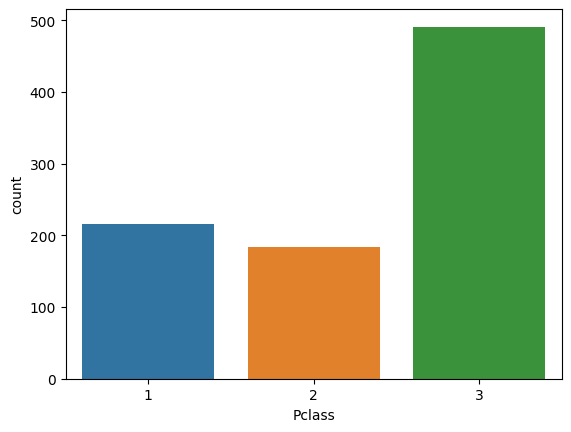

In [ ]:
sns.countplot(x=train['Pclass'])

<Axes: xlabel='Sex', ylabel='count'>

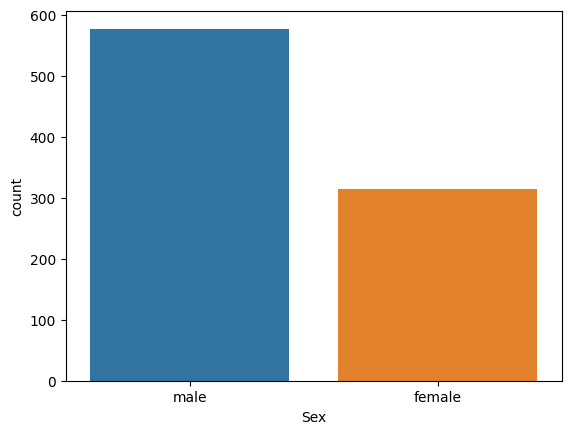

In [ ]:
sns.countplot(x=train['Sex'])

<Axes: xlabel='SibSp', ylabel='count'>

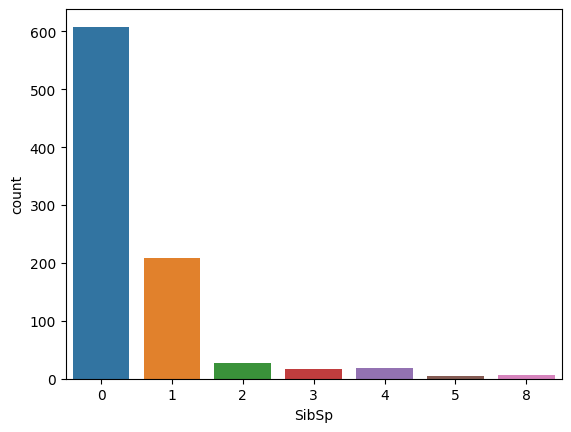

In [ ]:
sns.countplot(x=train['SibSp'])

<Axes: xlabel='Parch', ylabel='count'>

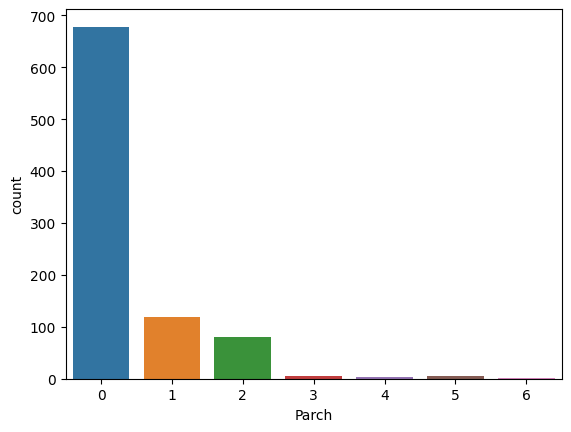

In [ ]:
sns.countplot(x=train['Parch'])

<Axes: xlabel='Embarked', ylabel='count'>

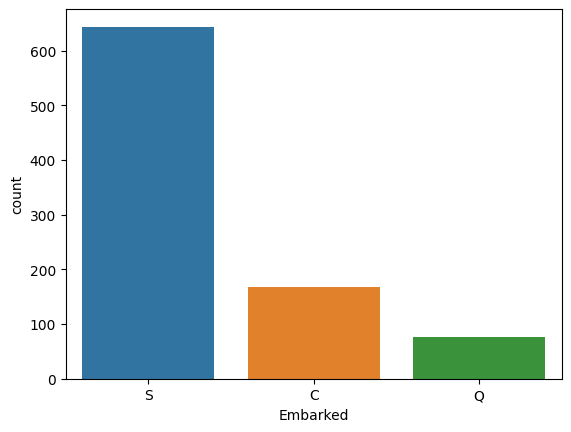

In [ ]:
sns.countplot(x=train['Embarked'])

<Axes: ylabel='Density'>

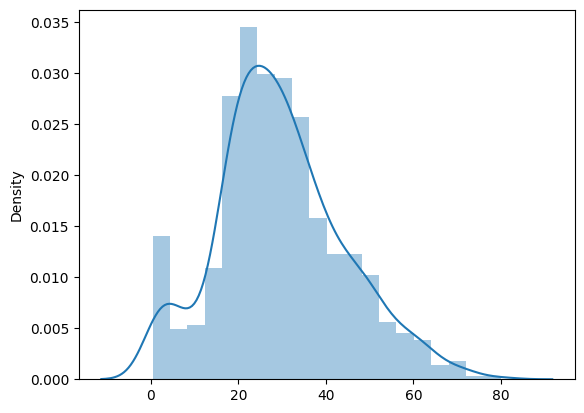

In [ ]:
##Numerical attributes
sns.distplot(x=train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

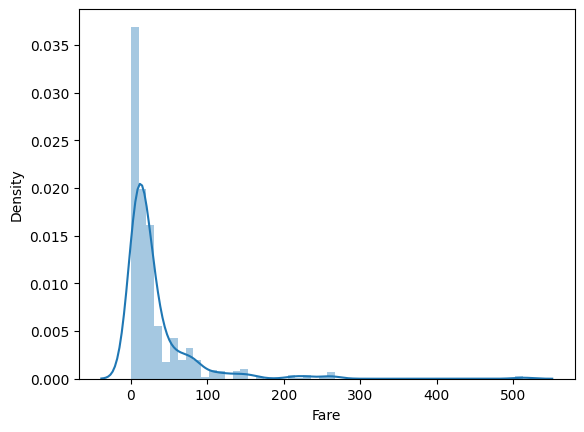

In [ ]:
sns.distplot(train['Fare'])

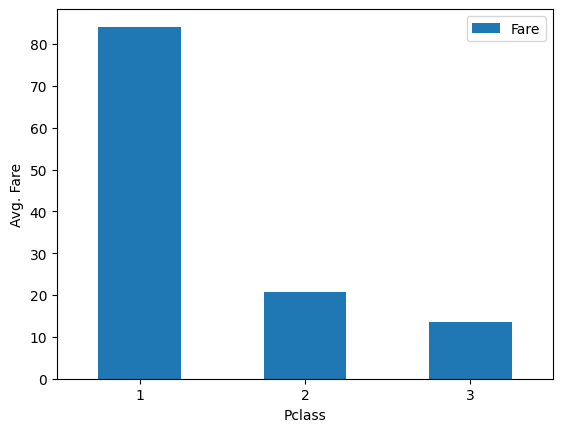

In [ ]:
class_fare=train.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel( 'Avg. Fare')
plt.xticks(rotation=0)
plt.show()

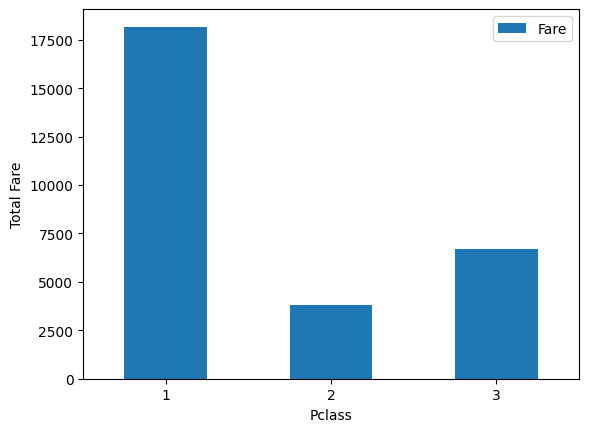

In [ ]:
class_fare=train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel( 'Total Fare')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

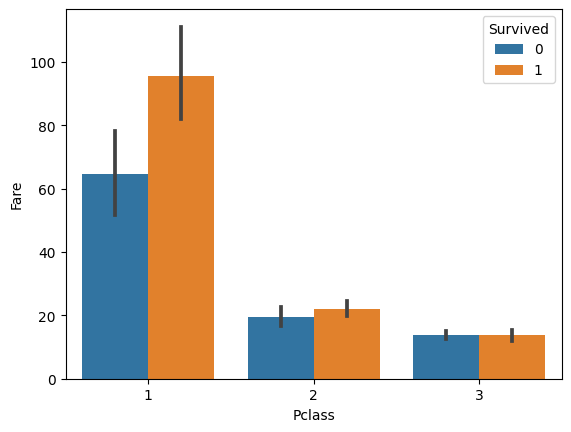

In [ ]:
sns.barplot(data=train, x='Pclass',y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

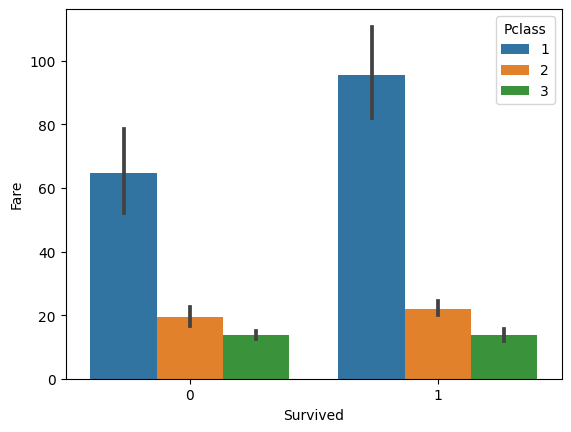

In [ ]:
sns.barplot(data=train, x='Survived',y='Fare', hue='Pclass')

In [ ]:
##Data Preprocessing
train_len=len(train)
#combine two dataframes
df=pd.concat([train,test],axis=0) #0 means it will concate row wise if 1 then column wise
df=df.reset_index(drop=True)
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
#Finding the Null values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
#Drop or delete the column
df=df.drop(columns=['Cabin'],axis=1)

In [ ]:
#fill missing values using mean of that numerical column
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())


In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:
# Fill missing values mode of the categorical column
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

<Axes: xlabel='Fare', ylabel='Density'>

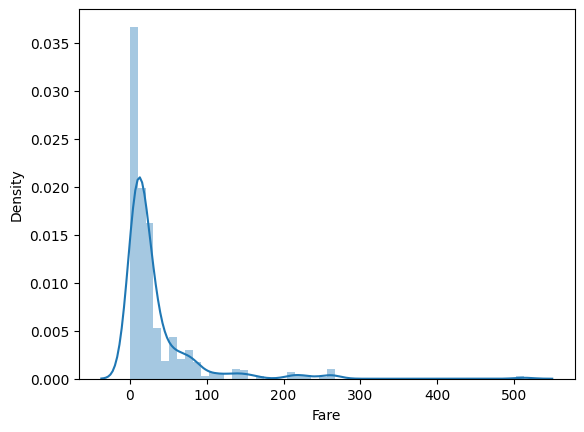

In [ ]:
##Log transformation for uniform data distribution

sns.distplot(df['Fare'])

##Corellation Matrix

In [ ]:
df['Fare']=np.log(df['Fare']+1)

<Axes: >

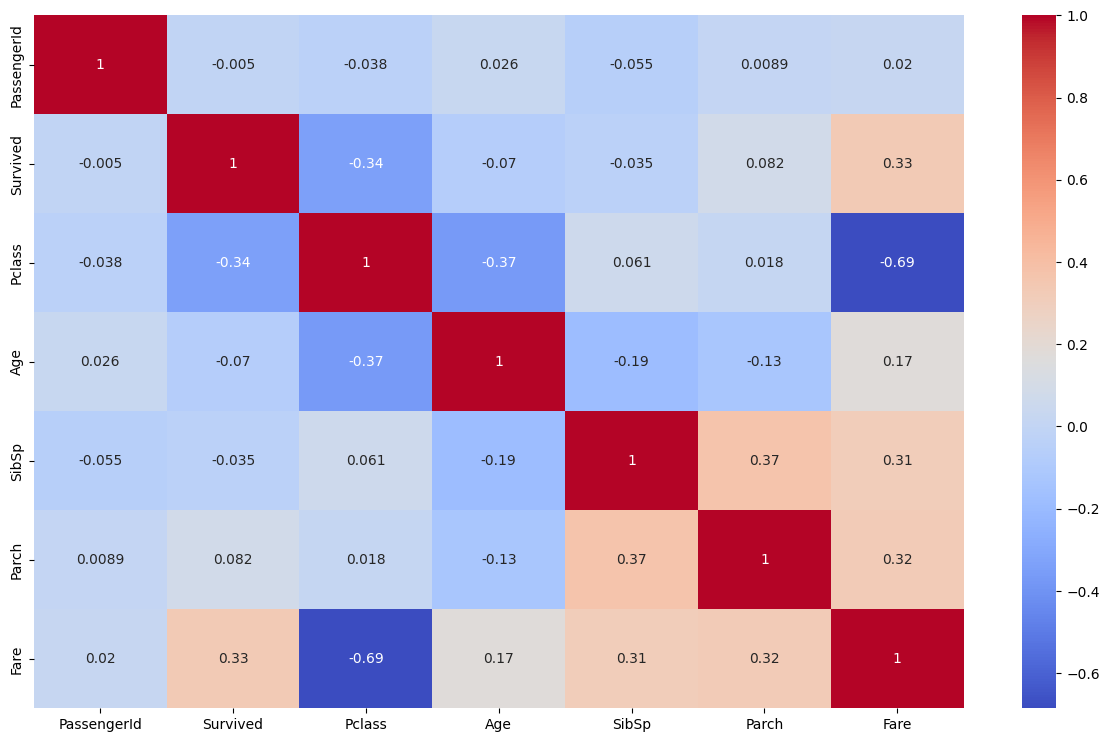

In [ ]:
corr=df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
##Drop  unnecessary columns

df=df.drop(columns=['Name','Ticket'],axis=1)
df.head() 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


In [ ]:

##Label Encoding

from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
le=LabelEncoder()

for col in cols:
  df[col]=le.fit_transform(df[col])

df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [ ]:
##Train test Split

train = df.iloc[:train_len,:]
test = df.iloc[train_len:,:]
#train.head()
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [ ]:
X=train.drop(columns=['PassengerId','Survived'],axis=1)
y=train['Survived']

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [ ]:
print(df.to_string())

In [ ]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.n_classes = len(self.classes)
        self.means_cont = {}
        self.variances_cont = {}
        self.priors = {}

        # Separate continuous and discrete features
        self.continuous_features = X.select_dtypes(include=np.number).columns.tolist()
        self.discrete_features = X.select_dtypes(include='object').columns.tolist()

        # Calculate means and variances for continuous features
        for c in self.classes:
            
            X_c = X[self.continuous_features][np.array(y == c)]
            self.means_cont[c] = np.mean(X_c, axis=0)
            self.variances_cont[c] = np.var(X_c, axis=0) 
            self.priors[c] = X_c.shape[0] / X.shape[0]

        # Encode discrete features
        self.label_encoders = {}
        for column in self.discrete_features:
            le = LabelEncoder()
            X[column] = le.fit_transform(X[column])
            self.label_encoders[column] = le

        # Calculate class probabilities for discrete features
        self.class_probs_disc = {}
        for c in self.classes:
            class_counts = {}
            for column in self.discrete_features:
                x = X.loc[y == c, column]
                counts = np.bincount(x, minlength=len(self.label_encoders[column].classes_))
                class_counts[column] = (counts + 1) / (np.sum(counts) + len(counts)) 
            

    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            x = X.iloc[i]
            posteriors = []
            for c in self.classes:
                prior = self.priors[c]
                likelihood_cont = np.prod(self._gaussian_pdf(x[self.continuous_features], self.means_cont[c], self.variances_cont[c]))
                likelihood_disc = 1.0
                for column in self.discrete_features:
                    likelihood_disc *= self.class_probs_disc[c][column][x[column]] 
                posterior = prior * likelihood_cont * likelihood_disc
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return y_pred

    def _gaussian_pdf(self, x, mean, variance):
        exponent = -(x - mean) ** 2 / (2 * variance)
        return np.exp(exponent) / np.sqrt(2 * np.pi * variance)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Training the model
model = GaussianNaiveBayes()
model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

# Reset indices of y_test and y_pred
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred, name='Survived')

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Predicting on the train set
y_pred_train = model.predict(X_train_scaled)

# Reset indices of y_train and y_pred_train
y_train = y_train.reset_index(drop=True)
y_pred_train = pd.Series(y_pred_train, name='Survived')

# Evaluating the model on the train set
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", accuracy_train)

Test Accuracy: 0.7761194029850746
Train Accuracy: 0.7640449438202247


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, learning_rate=0.1, max_epochs=1000):
        self.learning_rate = learning_rate     
        self.max_epochs = max_epochs
        self.weights = None

    def train(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)  # Initialize weights with zeros
        X = np.insert(X, 0, 1, axis=1)  # Add bias term to input features

        prev_error = float('inf')  # Initialize previous error as infinity
        for _ in range(self.max_epochs):
            errors = 0
            for xi, target in zip(X, y):
                activation = self.calculate_activation(xi)
                prediction = self.predict(activation)
                update = self.learning_rate * (target - prediction)
                self.weights += update * xi
                errors += int(update != 0.0)

            if errors >= prev_error:
                break
            else:
                prev_error = errors

    def calculate_activation(self, X):
        return np.dot(X, self.weights)

    def predict(self, activation):
        return np.where(activation >= 0, 1, 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Perceptron model
model = Perceptron(learning_rate=0.1, max_epochs=1000)
model.train(X_train.values, y_train.values)

# Save the weight values
# weights = model.weights
# print("Weights:", weights)

# Predict on the test set
X_test_with_bias = np.insert(X_test.values, 0, 1, axis=1)  # Add bias term to test data
activations = np.dot(X_test_with_bias, model.weights)
y_pred = model.predict(activations)

# Calculate the accuracy
accuracy = accuracy_score(y_test.values, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.6455223880597015
